# Visually Exploring Data Using Seaborn

We are using Australian weather data, taken from Kaggle. To download the
data, click <a href="data/weatherAUS.csv" download>here</a>.

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import the dataset
df = pd.read_csv('data/weatherAUS.csv')

Objectives:

-   Understand how to describe data quantitatively and when different
    methods are appropriate
-   Visualise data as a means of describing it
-   Show how to visualising data is a shortcut for describing central
    tendency, spread, uncertainty etc.
-   Introduce ideas around describing and visualising relationships
    between variables

In [2]:
# subset of observations from five biggest cities
big_cities = (
    df.loc[df['Location'].isin(['Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney'])]
    .copy()
)

## Visualising a Single Variable

-   What do we want to know when we are visualising a sample taken from
    a single variable?
-   We want to understand the value that the value tends to take, and
    how much it tends to deviate from its typical value.
    -   The central tendency and deviation are ways to describe a
        sample.
    -   Visualising the distribution of a variable can tell us these
        things (approximately), and can tell us about the shape of the
        data too.

### Describing a Sample

-   What is the best way to describe a variable?
    -   What is the average value? Or the value it is most likely to
        take? What is the best value to describe it in one go?
-   The “central tendency” is the average or most common value that a
    variable takes. Mean, median, and mode are all descriptions of the
    central tendency.
    -   Mean - Sum of values in a sample divided by the total number of
        observations
    -   Median - The midpoint value if the sample is ordered from
        highest to lowest
    -   Mode - The most common value in the sample
-   The mean is the most common approach, but the mean, median, and mode
    choice are context-dependent. Other approaches exist, too, such as
    the geometric mean.
    -   The geometric mean multiplies all values in the sample and takes
        the $n$th root of that multiplied value.
    -   It can be useful when dealing with skewed data or data with very
        large ranges, and when dealing with rates, proportions etc.
        However it can’t handle zeros or negative values.
-   The mode value is generally most useful when dealing with
    categorical variables.

In [3]:
# mode rainfall by location
big_cities.groupby('Location')['Rainfall'].agg(pd.Series.mode)

Location
Adelaide     0.0
Brisbane     0.0
Melbourne    0.0
Perth        0.0
Sydney       0.0
Name: Rainfall, dtype: float64

In [4]:
# mode location
big_cities['Location'].agg(pd.Series.mode)

0    Sydney
Name: Location, dtype: object

In [5]:
# mode location using value counts
big_cities['Location'].value_counts().iloc[0:1]

Location
Sydney    3344
Name: count, dtype: int64

In [6]:
# mean rainfall by location
np.round(big_cities.groupby('Location')['Rainfall'].mean(), decimals=2)

Location
Adelaide     1.57
Brisbane     3.14
Melbourne    1.87
Perth        1.91
Sydney       3.32
Name: Rainfall, dtype: float64

In [7]:
# median rainfall by location
big_cities.groupby('Location')['Rainfall'].median()

Location
Adelaide     0.0
Brisbane     0.0
Melbourne    0.0
Perth        0.0
Sydney       0.0
Name: Rainfall, dtype: float64

In [8]:
# geometric mean max temperature by location
big_cities.groupby('Location')['MaxTemp'].apply(lambda x: np.exp(np.log(x).mean()))

Location
Adelaide     21.888697
Brisbane     26.152034
Melbourne    19.972352
Perth        24.320203
Sydney       22.570993
Name: MaxTemp, dtype: float64

-   Why do the mean and median differ so much? Why would the median
    rainfall be zero for all five cities?
-   Does this matter? How would it change our understanding of the
    rainfall variable?
-   Visualising the distribution can tell us more!

### Comparing the Mean & Median

-   We have simulated three different distributions that have slightly
    different shapes. and see how their mean and median values differ.

In [9]:
# generate distributions
np.random.seed(123)
normal_dist = np.random.normal(10, 1, 1000)
right_skewed_dist = np.concatenate([np.random.normal(8, 2, 600), np.random.normal(14, 4, 400)])
left_skewed_dist = np.concatenate([np.random.normal(14, 2, 600), np.random.normal(8, 4, 400)])

In [10]:
# import packages
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

# control some deprecation warnings in seaborn
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module="seaborn"
)

# set figure size
plt.rcParams['figure.figsize'] = (12, 6)

# function for calculating summary statistics and plotting distributions
def plot_averages(ax, data, title):
    mean = np.mean(data)
    median = np.median(data)
    
    sns.histplot(data, color="#d9dcd6", bins=30, ax=ax)
    ax.axvline(mean, color="#0081a7", linewidth=3, linestyle="--", label=f"Mean: {mean:.2f}")
    ax.axvline(median, color="#ef233c", linewidth=3, linestyle="--", label=f"Median: {median:.2f}")
    ax.set_title(title)
    ax.set_ylabel('')
    ax.legend()

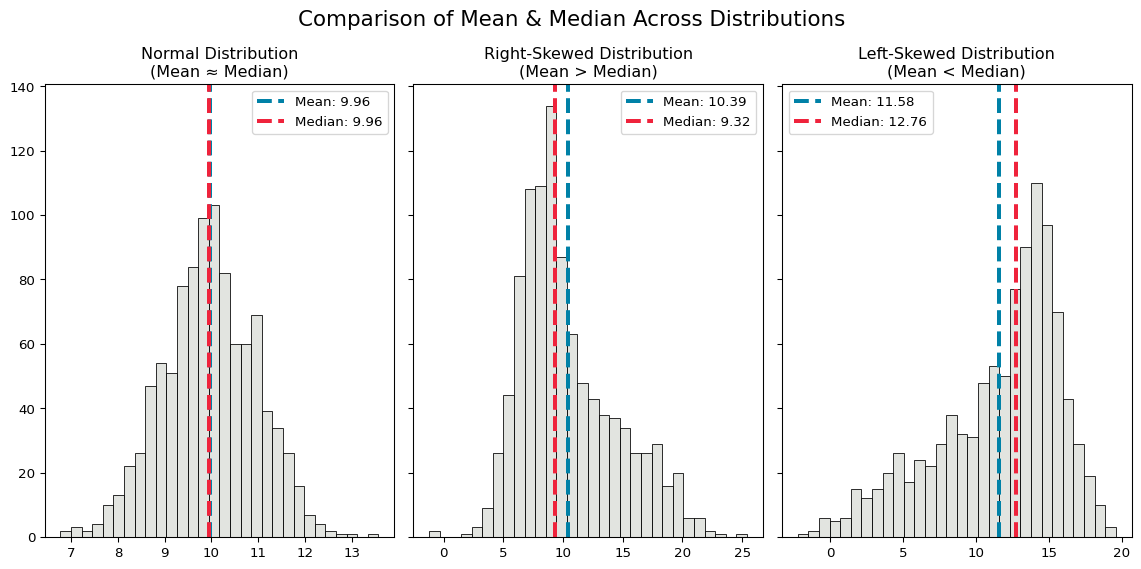

In [11]:
# plot distributions
fig, axes = plt.subplots(1, 3, sharey=True)

plot_averages(axes[0], normal_dist, "Normal Distribution\n(Mean ≈ Median)")
plot_averages(axes[1], right_skewed_dist, "Right-Skewed Distribution\n(Mean > Median)")
plot_averages(axes[2], left_skewed_dist, "Left-Skewed Distribution\n(Mean < Median)")

plt.suptitle("Comparison of Mean & Median Across Distributions", fontsize=16)
plt.tight_layout()
plt.show()

-   The mean and median of the normal distribution are identical, while
    the two skewed distributions have slightly different means and
    medians.
    -   The mean is larger than the media when the distribution is
        right-skewed, and the median is larger than the mean when it is
        left-skewed.
    -   When the distribution is skewed, the median value will be a
        better description of the central tendency, because the mean
        value is more sensitive to extreme values (and skewed
        distributions have longer tails of extreme values).
-   These differences point to another important factor to consider when
    summarising data - the spread or deviation of the sample.
-   How do we measure how a sample is spread around the central
    tendency?
    -   Standard deviation and variance quantify spread.
    -   Variance, the average squared difference between observations
        and the mean value, measures how spread out a sample is.
    -   Standard deviation is the square root of the variance. It’s
        easier to interpret because it’s in the same units as the
        sample.

In [12]:
# generate distributions
np.random.seed(123)
mean = 10
std_devs = [1, 2, 3]
distributions = [np.random.normal(mean, std_dev, 1000) for std_dev in std_devs]

In [13]:
# function for calculating summary statistics and plotting distributions
def plot_spread(ax, data, std_dev, title):
    mean = np.mean(data)
    std_dev = np.std(data)

    sns.histplot(data, color="#d9dcd6", bins=30, ax=ax)
    ax.axvline(mean, color="#0081a7", linewidth=3, linestyle="--", label=f"Mean: {mean:.2f}")
    ax.axvline(mean + std_dev, color="#ee9b00", linewidth=3, linestyle="--", label=f"Mean + 1 SD: {mean + std_dev:.2f}")
    ax.axvline(mean - std_dev, color="#ee9b00", linewidth=3, linestyle="--", label=f"Mean - 1 SD: {mean - std_dev:.2f}")
    ax.set_title(f"{title}")
    ax.legend()

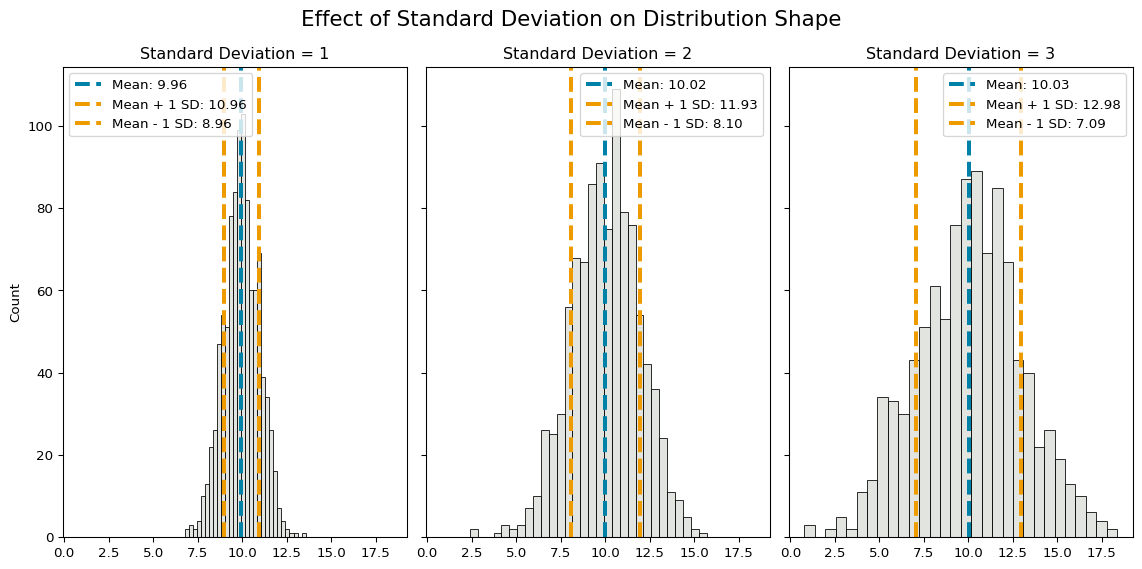

In [14]:
# plot distributions
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

for i, std_dev in enumerate(std_devs):
    plot_spread(axes[i], distributions[i], std_dev, f"Standard Deviation = {std_dev}")

plt.suptitle("Effect of Standard Deviation on Distribution Shape", fontsize=16)
plt.tight_layout()
plt.show()

-   As standard deviation increases, the spread of values around the
    mean increases.
-   We can compute various summary statistics that describe a sample
    (mean, median, standard deviation, kurtosis etc. etc.), or we can
    just visualise it!
-   Visualising distributions is a good starting point for understanding
    a sample. It can quickly and easily tell you a lot about the data.

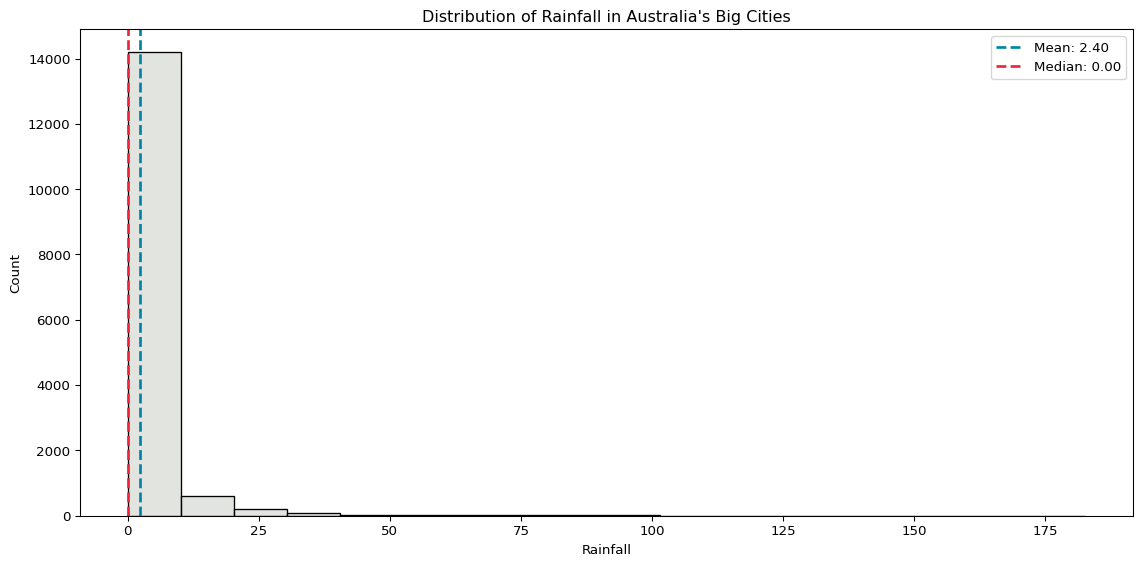

In [15]:
# plot distribution of rainfall
rainfall_mean = np.mean(big_cities['Rainfall'])
rainfall_median = np.median(big_cities['Rainfall'].dropna())

sns.histplot(data=big_cities, x='Rainfall', binwidth=10, color="#d9dcd6")
plt.axvline(rainfall_mean, color="#0081a7", linestyle="--", linewidth=2, label=f"Mean: {rainfall_mean:.2f}")
plt.axvline(rainfall_median, color="#ef233c", linestyle="--", linewidth=2, label=f"Median: {rainfall_median:.2f}")

plt.title("Distribution of Rainfall in Australia's Big Cities")

plt.legend()
plt.tight_layout()
plt.show()

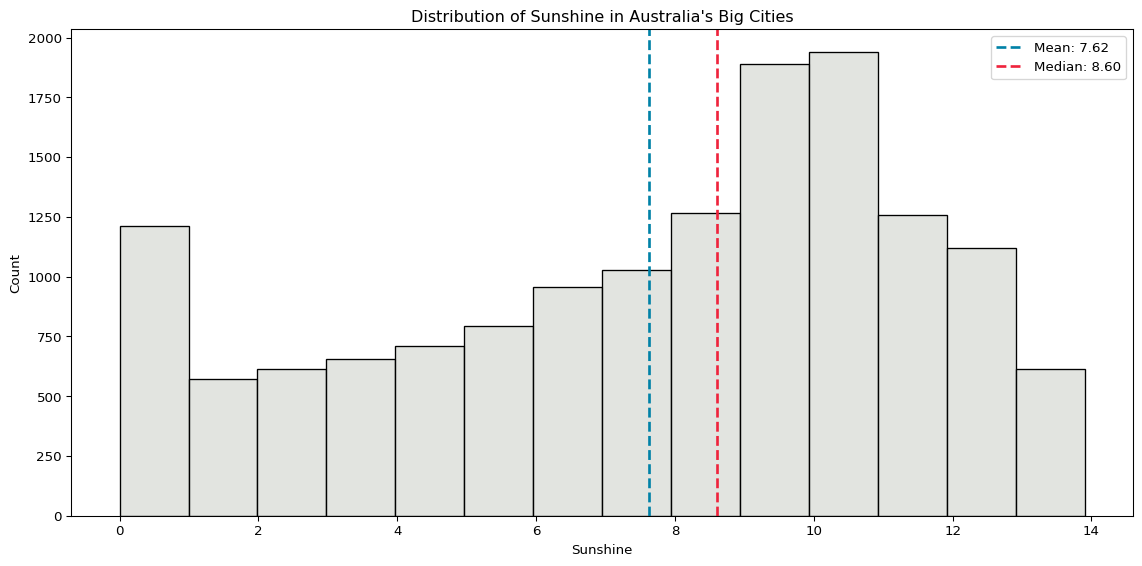

In [16]:
# plot distribution of sunshine
sunshine_mean = np.mean(big_cities['Sunshine'])
sunshine_median = np.median(big_cities['Sunshine'].dropna())

sns.histplot(data=big_cities, x='Sunshine', binwidth=1, color="#d9dcd6")
plt.axvline(sunshine_mean, color="#0081a7", linestyle="--", linewidth=2, label=f"Mean: {sunshine_mean:.2f}")
plt.axvline(sunshine_median, color="#ef233c", linestyle="--", linewidth=2, label=f"Median: {sunshine_median:.2f}")

plt.title("Distribution of Sunshine in Australia's Big Cities")

plt.legend()
plt.tight_layout()
plt.show()

-   These two plots require a little more code, but we can get most of
    what we want with a lot less.

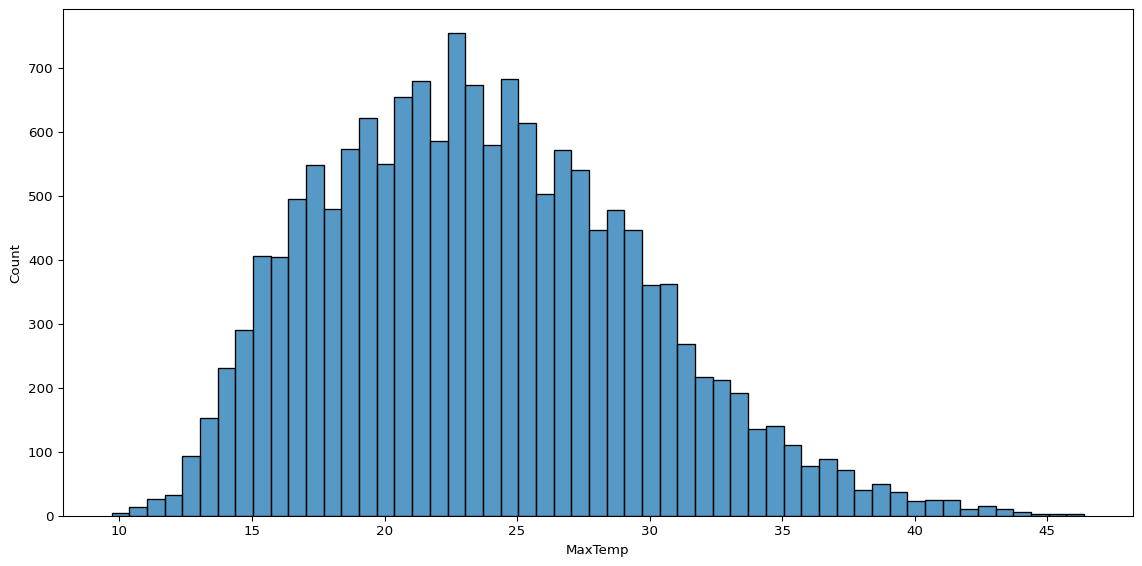

In [17]:
sns.histplot(data=big_cities, x='MaxTemp')
plt.tight_layout()
plt.show()

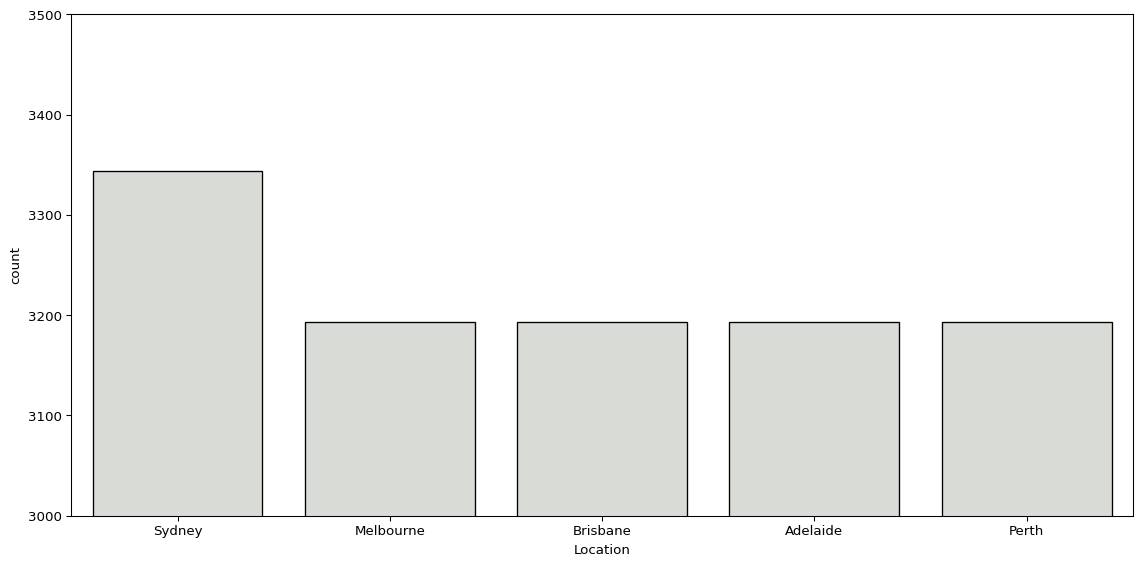

In [18]:
sns.countplot(big_cities, x='Location', color="#d9dcd6", edgecolor='black')
plt.ylim(3000, 3500)
plt.tight_layout()
plt.show()

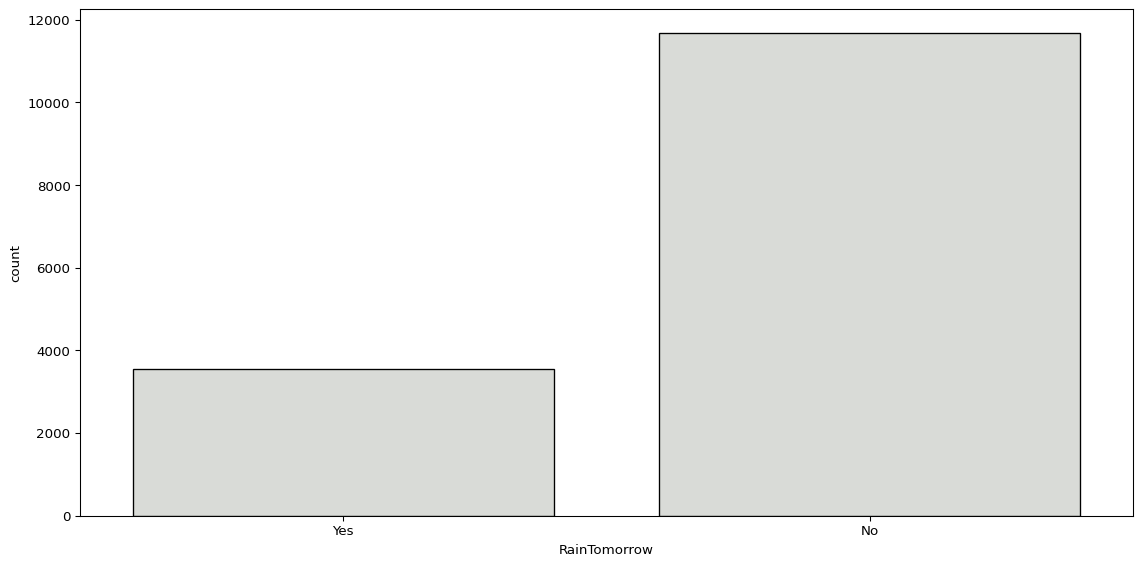

In [19]:
sns.countplot(big_cities, x='RainTomorrow', color="#d9dcd6", edgecolor='black')
plt.tight_layout()
plt.show()

In [20]:
big_cities['RainTomorrow'].value_counts()

RainTomorrow
No     11673
Yes     3543
Name: count, dtype: int64

## Visualising Multiple Variables

-   We will often want to know how values of a given variable change
    based on the values of another.
-   This may not indicate a relationship, but it helps us better
    understand our data.

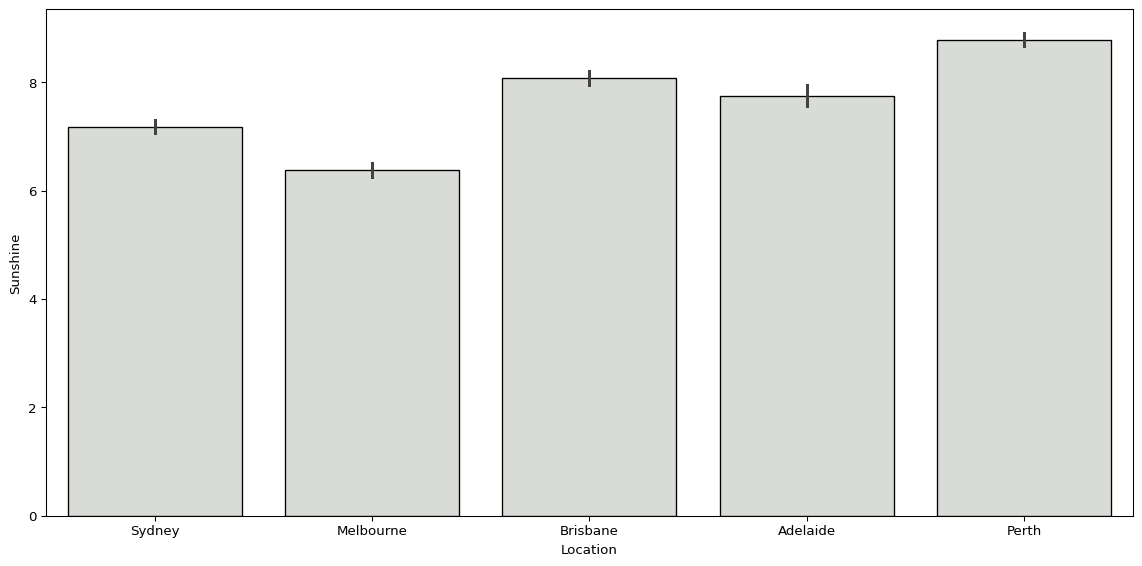

In [21]:
sns.barplot(big_cities, x='Location', y='Sunshine', color="#d9dcd6", edgecolor='black')
plt.tight_layout()
plt.show()

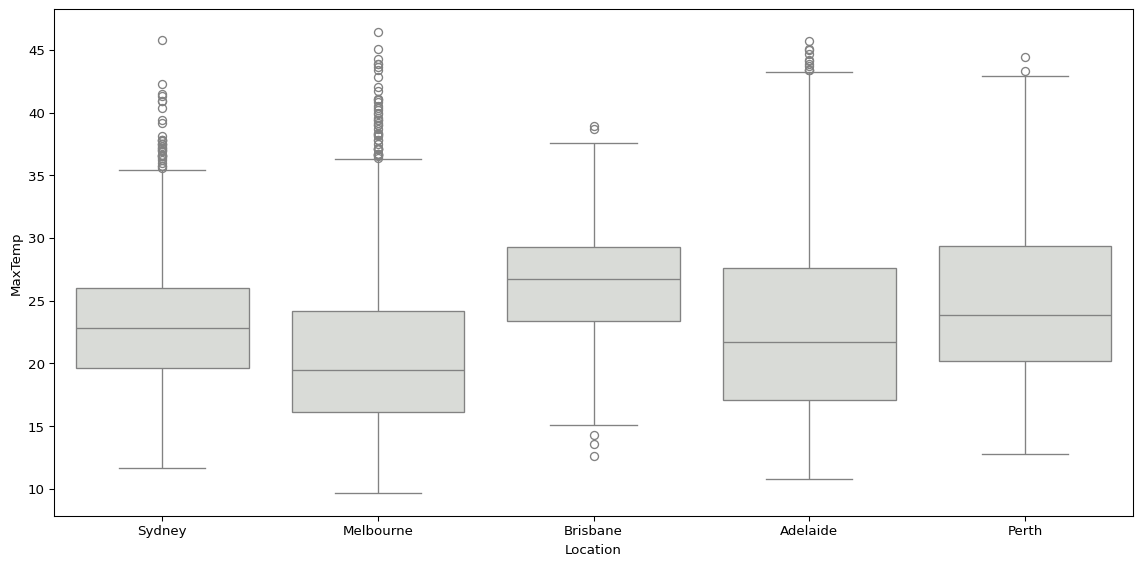

In [22]:
sns.boxplot(big_cities, x='Location', y='MaxTemp', color="#d9dcd6")
plt.tight_layout()
plt.show()

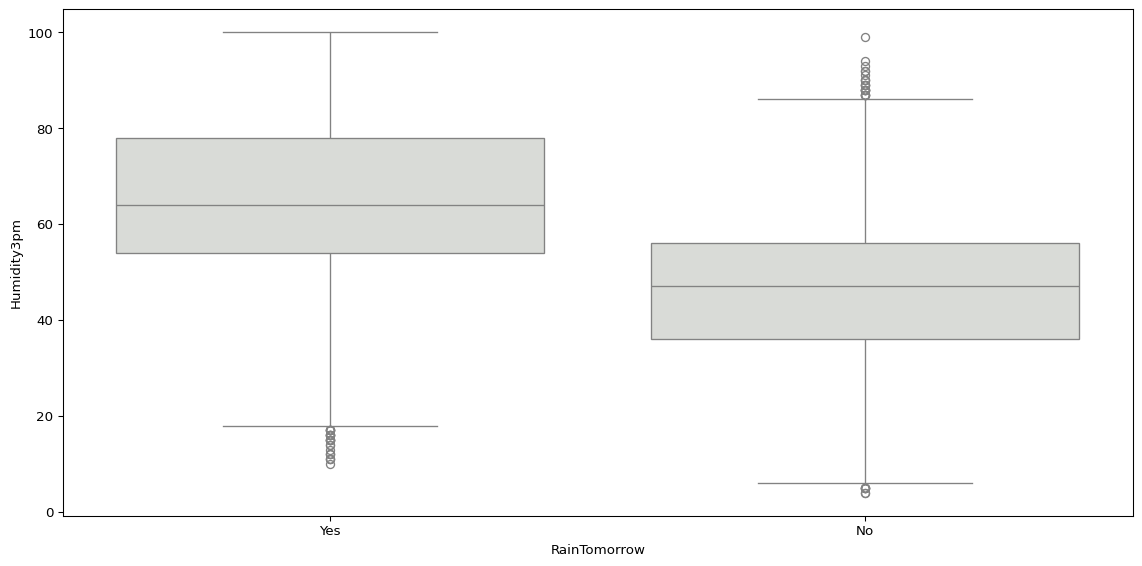

In [23]:
sns.boxplot(data=big_cities, x='RainTomorrow', y='Humidity3pm', color="#d9dcd6")
plt.tight_layout()
plt.show()

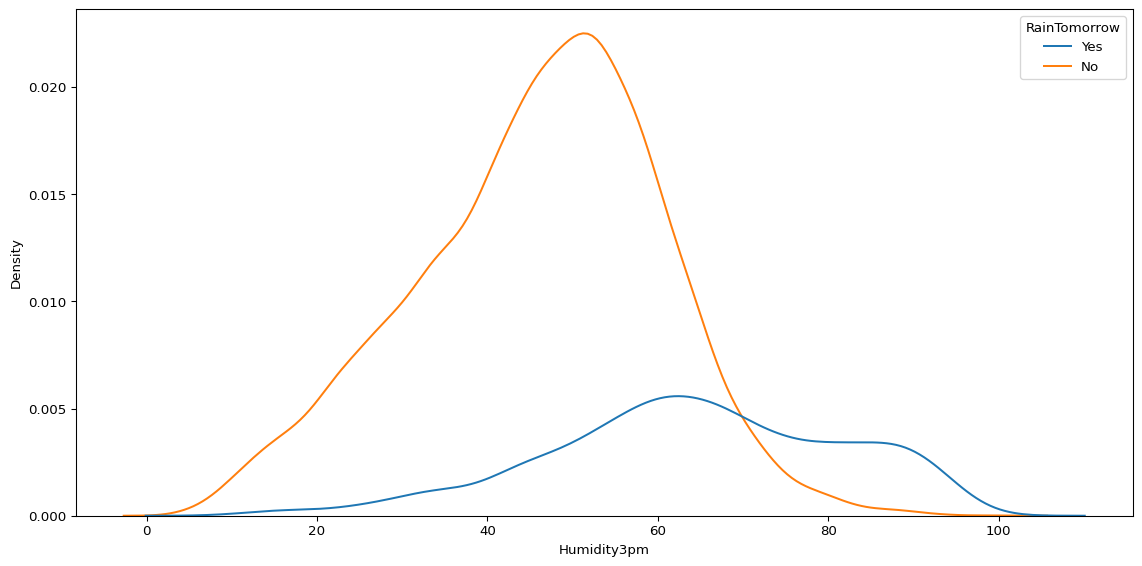

In [24]:
sns.kdeplot(data=big_cities, x='Humidity3pm', hue='RainTomorrow')
plt.tight_layout()
plt.show()

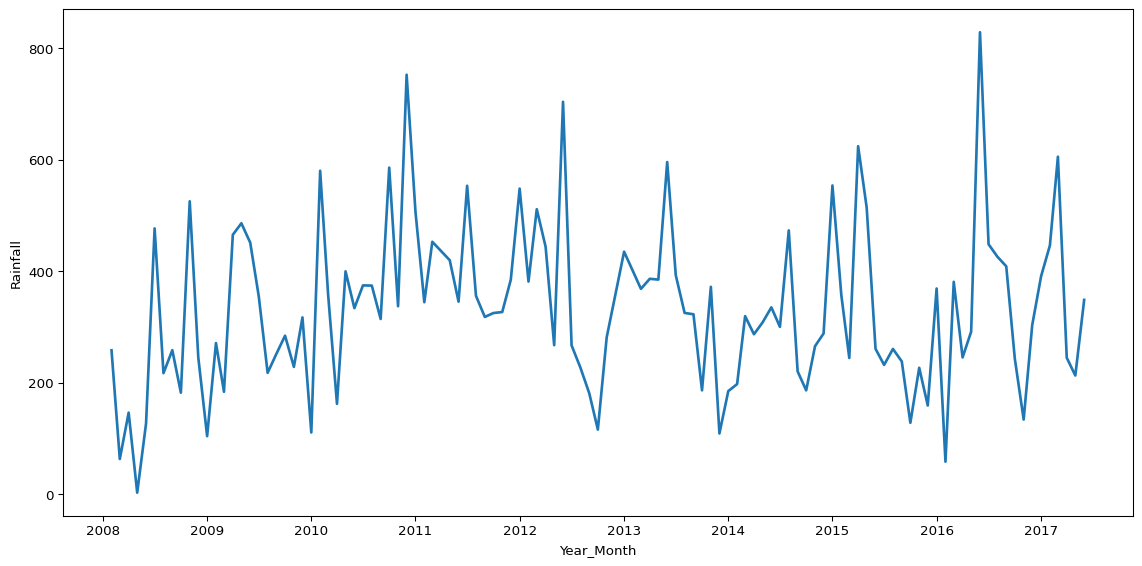

In [25]:
(
    big_cities
    # convert date to datetime
    .assign(Date=pd.to_datetime(big_cities['Date']))
    # create year-month column
    .assign(Year_Month=lambda x: x['Date'].dt.to_period('M'))
    # group by year-month and calculate sum of rainfall
    .groupby('Year_Month')['Rainfall'].sum()
    # convert year-month index back to column in dataframe
    .reset_index()
    # create year-month timestamp for plotting
    .assign(Year_Month=lambda x: x['Year_Month'].dt.to_timestamp()) 
    # pass df object to seaborn lineplot
    .pipe(lambda df: sns.lineplot(data=df, x='Year_Month', y='Rainfall', linewidth=2))
)

plt.tight_layout()
plt.show()

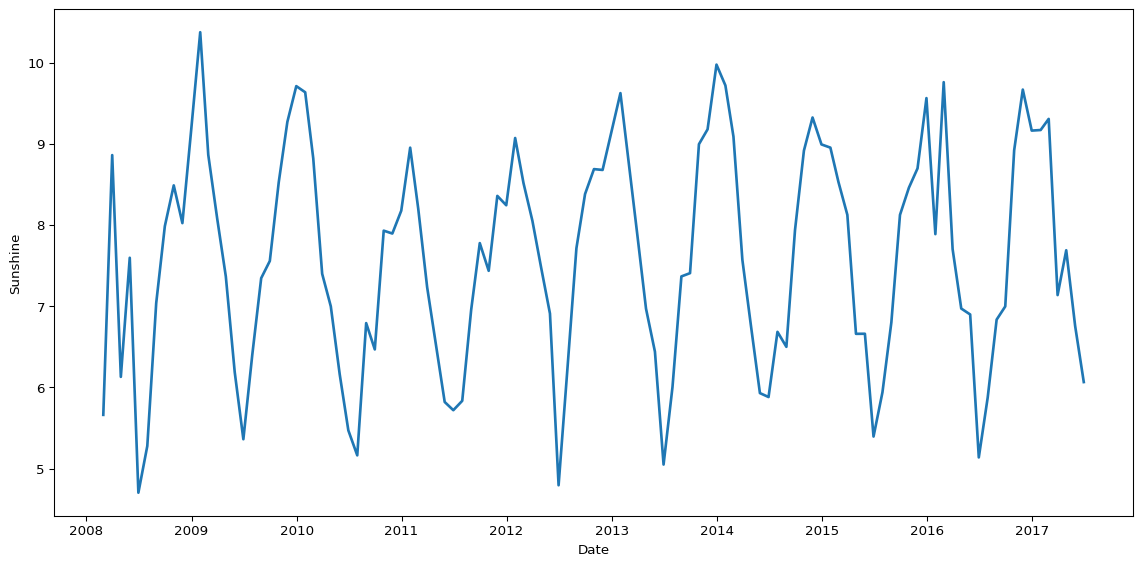

In [26]:
(
    big_cities
    # convert date to datetime object
    .assign(Date=pd.to_datetime(big_cities['Date']))
    # set date column as index
    .set_index('Date')
    # resample by month-end for monthly aggregations
    .resample('ME')
    # calculate mean sunshine per month
    .agg({'Sunshine': 'mean'})
    # convert month index back to column in dataframe
    .reset_index()
    # pass df object to seaborn lineplot
    .pipe(lambda df: sns.lineplot(data=df, x='Date', y='Sunshine', color="#1f77b4", linewidth=2))
)

plt.tight_layout()
plt.show()

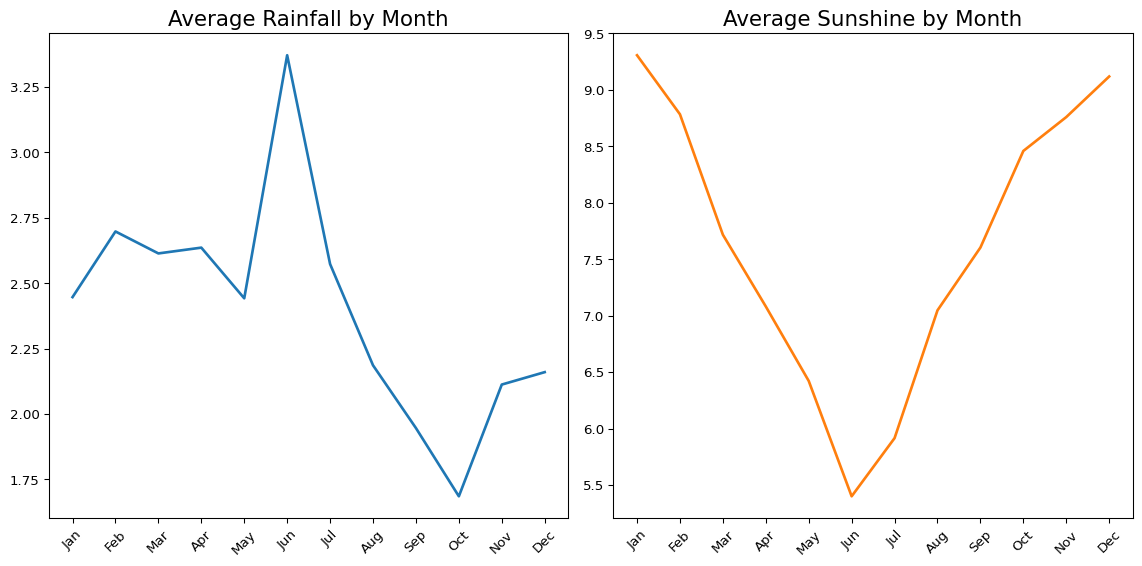

In [27]:
fig, axes = plt.subplots(1, 2)

(
    big_cities
    .assign(Date=pd.to_datetime(big_cities['Date']))
    .assign(Month=lambda x: x['Date'].dt.month)
    .groupby('Month')['Rainfall'].mean()
    .reset_index()
    .pipe(lambda df: sns.lineplot(data=df, x='Month', y='Rainfall', color="#1f77b4", linewidth=2, ax=axes[0]))
)

(
    big_cities
    .assign(Date=pd.to_datetime(big_cities['Date']))
    .assign(Month=lambda x: x['Date'].dt.month) 
    .groupby('Month')['Sunshine'].mean() 
    .reset_index()
    .pipe(lambda df: sns.lineplot(data=df, x='Month', y='Sunshine', color="#ff7f0e", linewidth=2, ax=axes[1]))
)

xticks = range(1, 13)
xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for ax in axes:
    ax.set_xticks(xticks)  # Set ticks
    ax.set_xticklabels(xticklabels, rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('')
axes[0].set_title('Average Rainfall by Month', fontsize=16)
axes[1].set_title('Average Sunshine by Month', fontsize=16)

plt.tight_layout()
plt.show()